In [3]:
%pip install pandas
%pip install openpyxl
import pandas as pd
import io


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [36]:
nettit = pd.read_csv('netflix_titles.csv')
net = pd.read_excel('netflix.xlsx')


In [5]:
net.head()

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2023-03-29 12:00:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany)
1,2023-03-29 11:45:00,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany)
2,2023-03-29 10:40:00,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany)
3,2023-03-21 12:23:00,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany)
4,2023-03-21 12:22:00,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany)


In [6]:
titles_a = net['Title'].unique()
titles_b = nettit['title'].unique()

In [7]:
len(list(set(titles_a).intersection(titles_b)))

57

In [8]:
only_b = [title for title in titles_b if not title in titles_a]
len(only_b)

8750

In [9]:
nettit.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [37]:
import gender_guesser.detector as gender
d = gender.Detector()

def get_gender(name):
    first_name = str(name).split()[0]
    return d.get_gender(first_name)

nettit_directors = nettit[nettit['director'].notna()]
nettit_directors['gender'] = nettit_directors['director'].apply(get_gender)

/tmp/ipykernel_3462881/4261025917.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nettit_directors['gender'] = nettit_directors['director'].apply(get_gender)


In [38]:
nettit_directors.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",male


In [39]:
nettit_directors.to_csv('nettit_directors.csv')

In [12]:
old_movies = nettit[nettit['release_year'] == nettit['release_year'].min()]
old_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


In [18]:
genderless = nettit_directors[nettit_directors['gender'] == 'unknown']
len(genderless)

1167

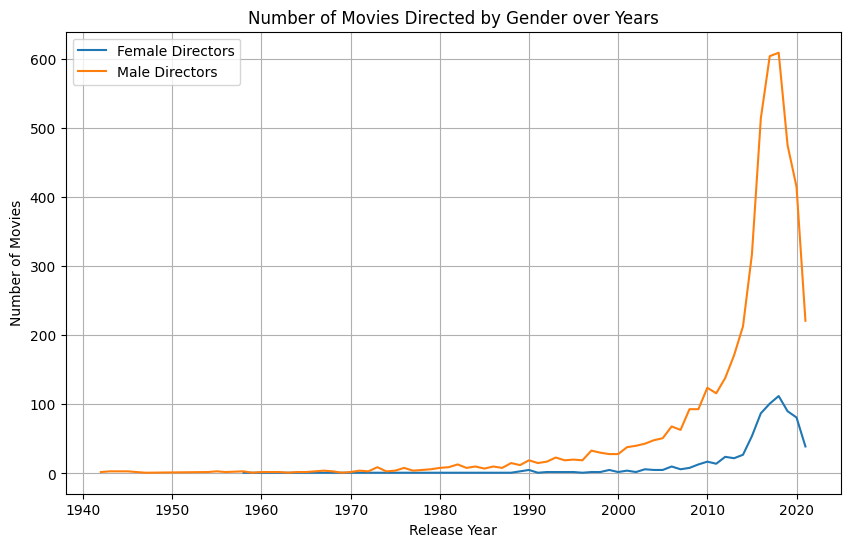

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame for female directors
female_directors = nettit_directors[nettit_directors['gender'].str.endswith('female')]

# Filter DataFrame for male directors
male_directors = nettit_directors[nettit_directors['gender'].str.endswith('male')]



# Count the occurrences of each release year for female directors
female_counts = female_directors['release_year'].value_counts().sort_index()

# Count the occurrences of each release year for male directors
male_counts = male_directors['release_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=female_counts.index, y=female_counts.values, label='Female Directors')
sns.lineplot(x=male_counts.index, y=male_counts.values, label='Male Directors')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Directed by Gender over Years')
plt.legend()
plt.grid(True)
plt.show()

In [35]:
len(nettit_directors_2000)

5700

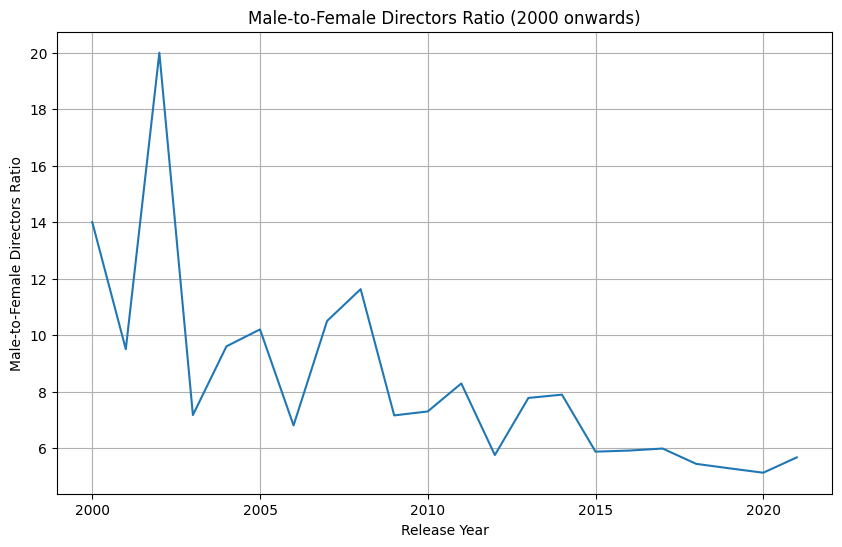

In [29]:
# Filter DataFrame for movies released from 2000 onwards
nettit_directors_2000 = nettit_directors[nettit_directors['release_year'] >= 2000]

# Filter DataFrame for female directors from 2000 onwards
female_directors_2000 = nettit_directors_2000[nettit_directors_2000['gender'].str.endswith('female')]

# Filter DataFrame for male directors from 2000 onwards
male_directors_2000 = nettit_directors_2000[nettit_directors_2000['gender'].str.endswith('male')]

# Count the occurrences of each release year for female directors from 2000 onwards
female_counts_2000 = female_directors_2000['release_year'].value_counts().sort_index()

# Count the occurrences of each release year for male directors from 2000 onwards
male_counts_2000 = male_directors_2000['release_year'].value_counts().sort_index()

# Calculate the ratio of male to female directors for each year from 2000 onwards
ratio_2000 = male_counts_2000 / female_counts_2000

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=ratio_2000.index, y=ratio_2000.values)
plt.xlabel('Release Year')
plt.ylabel('Male-to-Female Directors Ratio')
plt.title('Male-to-Female Directors Ratio (2000 onwards)')
plt.grid(True)
plt.show()



In [34]:
ages = {
    'PG-13': 13,
    'TV-MA': 18, 
    'PG': 0, 
    'TV-14' : 14, 
    'TV-PG': 0, 
    'TV-Y': 0, 
    'TV-Y7': 7, 
    'R': 17,
    'TV-G': 0, 
    'G': 0, 
    'NC-17': 18, 
    'NR': 1, 
    'TV-Y7-FV': 7
}

def get_age(rating):
    if rating in ages.keys():
        return ages[rating]
    else:
        return -1

nettit['min_age'] = nettit['rating'].apply(get_age)
nettit_min_age = nettit[nettit['min_age'] != -1]
nettit_min_age

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,min_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",13
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",18
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,18
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",18
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",17
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,17
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",0
